# 인공지능개론 머신러닝, 딥러닝 실습

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week5/heart.csv") # 로컬(MAC)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### 머신러닝

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

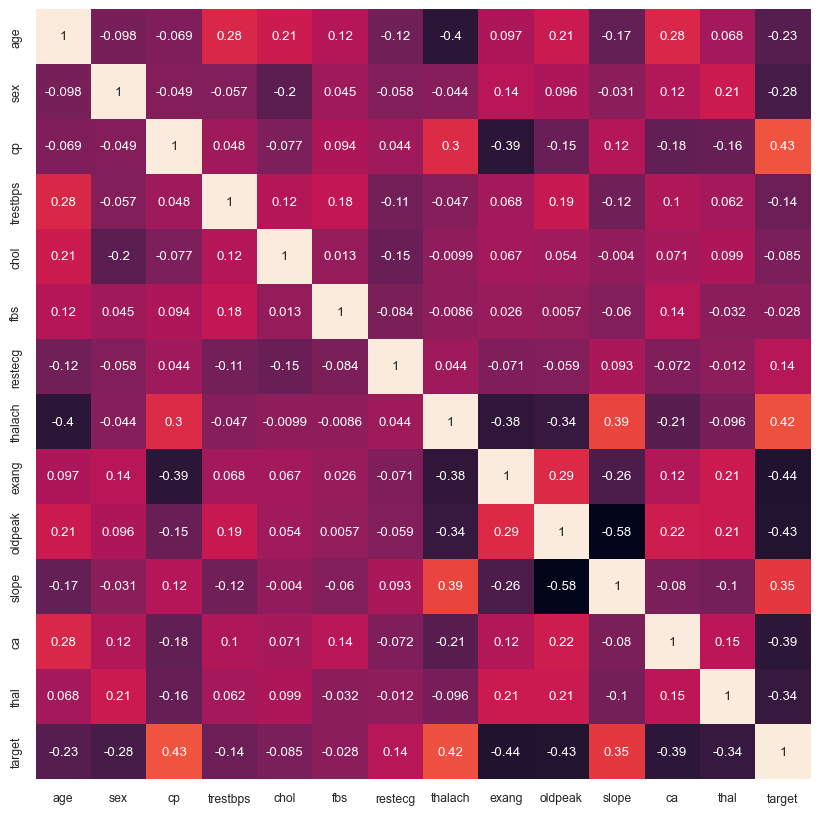

In [27]:
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
x = df.drop('target', axis=1)
y = df['target']

In [13]:
# 정규화
scaler = StandardScaler()
x = scaler.fit_transform(x)

# 트레인 / 테스트 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train) # 모델 학습

pred_svm = clf_svm.predict(x_test) # 테스트 데이터 예측

print("\n--- SVM Classifier ---")
print("accuracy : ", accuracy_score(y_test, pred_svm)) # 정확도 출력
print(confusion_matrix(y_test, pred_svm)) # 혼동행렬 출력


--- SVM Classifier ---
accuracy :  0.8688524590163934
[[21  6]
 [ 2 32]]


In [21]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print ("accuracy : ", accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
accuracy :  0.8524590163934426
[[21  6]
 [ 3 31]]


In [23]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print ("accuracy : ", accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
accuracy :  0.7704918032786885
[[22  5]
 [ 9 25]]


In [25]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

print ("\n--- Radom Forest ---")
print("accuracy : ", accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
accuracy :  0.8688524590163934
[[24  3]
 [ 5 29]]


### 딥러닝